In [1]:
import gdal as gd

In [2]:
from osgeo import gdal
import rasterio

In [4]:
import os
import sys

In [5]:
sys.path.append( '../pymod' )

# Gdal reading landscape file

In [6]:
ds = gdal.Open('landscape_lcp/Landscape_1.lcp')

In [7]:
if ds.RasterCount != 8:
        gdaltest.post_reason('wrong number of bands')
        print('cool')

In [8]:
ds.RasterCount

8

In [9]:
ds.GetProjectionRef().find('NAD_1983_UTM_Zone_12N')

-1

In [10]:
ds.GetProjectionRef()

'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [12]:
testing = ds.GetGeoTransform()

In [13]:
md = ds.GetMetadata()

In [14]:
md

{'DESCRIPTION': '', 'LATITUDE': '38', 'LINEAR_UNIT': 'Meters'}

# Projection Handling for LCP file

In [15]:
new_gt = ds.GetGeoTransform()

In [16]:
new_gt
check_gt = (285807.932887174887583,30,0,5379230.386217921040952,0,-30)

In [17]:
for i in range(6):
        if abs(new_gt[i]-check_gt[i]) > 1e-5:
            print('')
            print('old = ', check_gt)
            print('new = ', new_gt)


old =  (285807.9328871749, 30, 0, 5379230.386217921, 0, -30)
new =  (-2293725.0, 30.0, 0.0, 2062245.0, 0.0, -30.0)

old =  (285807.9328871749, 30, 0, 5379230.386217921, 0, -30)
new =  (-2293725.0, 30.0, 0.0, 2062245.0, 0.0, -30.0)


# Testing Raster Band Material

In [18]:
dataPerBand = [ ( 18645, [  ('ELEVATION_UNIT', '0' ),
                                ('ELEVATION_UNIT_NAME', 'Meters' ),
                                ('ELEVATION_MIN', '1064' ),
                                ('ELEVATION_MAX', '1492' ),
                                ('ELEVATION_NUM_CLASSES', '-1' ),
                                ('ELEVATION_FILE', '' ) ] ),
                    ( 16431, [  ('SLOPE_UNIT', '0' ),
                                ('SLOPE_UNIT_NAME', 'Degrees' ),
                                ('SLOPE_MIN', '0' ),
                                ('SLOPE_MAX', '34' ),
                                ('SLOPE_NUM_CLASSES', '36' ),
                                ('SLOPE_FILE', 'slope.asc' ) ] ),
                    ( 18851, [  ('ASPECT_UNIT', '2' ),
                                ('ASPECT_UNIT_NAME', 'Azimuth degrees' ),
                                ('ASPECT_MIN', '0' ),
                                ('ASPECT_MAX', '357' ),
                                ('ASPECT_NUM_CLASSES', '-1' ),
                                ('ASPECT_FILE', 'aspect.asc' ) ] ),
                    ( 26182, [  ('FUEL_MODEL_OPTION', '0' ),
                                ('FUEL_MODEL_OPTION_DESC', 'no custom models AND no conversion file needed' ),
                                ('FUEL_MODEL_MIN', '1' ),
                                ('FUEL_MODEL_MAX', '99' ),
                                ('FUEL_MODEL_NUM_CLASSES', '6' ),
                                ('FUEL_MODEL_VALUES', '1,2,5,8,10,99' ),
                                ('FUEL_MODEL_FILE', 'fbfm13.asc' ) ] ),
                    ( 30038, [  ('CANOPY_COV_UNIT', '0' ),
                                ('CANOPY_COV_UNIT_NAME', 'Categories (0-4)' ),
                                ('CANOPY_COV_MIN', '0' ),
                                ('CANOPY_COV_MAX', '95' ),
                                ('CANOPY_COV_NUM_CLASSES', '10' ),
                                ('CANOPY_COV_FILE', 'cancov.asc' ) ] ),
                    ( 22077, [  ('CANOPY_HT_UNIT', '3' ),
                                ('CANOPY_HT_UNIT_NAME', 'Meters x 10' ),
                                ('CANOPY_HT_MIN', '0' ),
                                ('CANOPY_HT_MAX', '375' ),
                                ('CANOPY_HT_NUM_CLASSES', '5' ),
                                ('CANOPY_HT_FILE', 'canht.asc' ) ] ),
                    ( 30388, [  ('CBH_UNIT', '3' ),
                                ('CBH_UNIT_NAME', 'Meters x 10' ),
                                ('CBH_MIN', '0' ),
                                ('CBH_MAX', '100' ),
                                ('CBH_NUM_CLASSES', '33' ),
                                ('CBH_FILE', 'cbh.asc' ) ] ),
                    ( 23249, [  ('CBD_UNIT', '3' ),
                                ('CBD_UNIT_NAME', 'kg/m^3 x 100' ),
                                ('CBD_MIN', '0' ),
                                ('CBD_MAX', '21' ),
                                ('CBD_NUM_CLASSES', '20' ),
                                ('CBD_FILE', 'cbd.asc' ) ] )
                  ]

In [19]:
raster = ds.GetRasterBand(1)

In [20]:
raster

<osgeo.gdal.Band; proxy of <Swig Object of type 'GDALRasterBandShadow *' at 0x111305870> >

In [21]:
import numpy as np

In [22]:
ds.GetRasterBand(4).ReadAsArray()

array([[165, 165, 165, ..., 147, 147, 147],
       [165, 165, 165, ..., 147, 102, 102],
       [165, 165, 165, ..., 102, 102, 102],
       ...,
       [165, 165, 165, ..., 165, 165, 122],
       [165, 165, 165, ..., 165, 165, 163],
       [165, 165, 165, ..., 189, 189, 165]], dtype=int16)

In [23]:
myarray = np.array(ds.GetRasterBand(4).ReadAsArray())

In [24]:
myarray

array([[165, 165, 165, ..., 147, 147, 147],
       [165, 165, 165, ..., 147, 102, 102],
       [165, 165, 165, ..., 102, 102, 102],
       ...,
       [165, 165, 165, ..., 165, 165, 122],
       [165, 165, 165, ..., 165, 165, 163],
       [165, 165, 165, ..., 189, 189, 165]], dtype=int16)

In [25]:
myarray.shape

(1124, 1209)

In [26]:
myarray.shape[0]

1124

In [27]:
myarray[0][0] = 0

# Define Driver type

In [28]:
mem_drv = gdal.GetDriverByName('MEM')

In [29]:
lcp_drv = gdal.GetDriverByName('LCP')

# Raster data Creation testing

In [30]:
import random
import struct
import numpy
from osgeo import osr

In [31]:
src_ds = mem_drv.Create('/vsimem2/', myarray.shape[1], myarray.shape[0], 8, gdal.GDT_Int16)

In [32]:
data = [98 for i in range(myarray.size)]
struct.pack('h'*myarray.size, *myarray.flatten().tolist()) == myarray.tobytes()

True

In [33]:
data = [random.randint(0, 100) for i in range(myarray.size)]
src_ds.GetRasterBand(4).WriteRaster(0, 0, myarray.shape[1], myarray.shape[0], myarray.tobytes())

0

In [70]:
import matplotlib as plt

- Set Projection

In [34]:
prj = ds.GetProjectionRef()
prj

'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

In [35]:
sr = osr.SpatialReference()
sr.SetProjection ("NAD83")
sr_wkt = sr.ExportToWkt()
print(sr_wkt)

PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["NAD83"],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [36]:

new_prj = src_ds.SetProjection(prj)

In [37]:
myarray = np.array(ds.GetRasterBand(4).ReadAsArray())

In [38]:
for i in range(8):
    #data = [random.randint(0, 100) for i in range(myarray.size)]
    myarray = ds.GetRasterBand(i+1).ReadAsArray()
    src_ds.GetRasterBand(i+1).WriteRaster(0, 0, myarray.shape[1], myarray.shape[0], myarray.tobytes())

+ Copy all Raster Band

1455

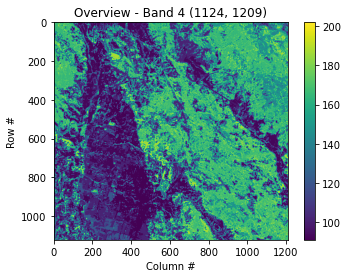

In [217]:
myarray = ds.GetRasterBand(4).ReadAsArray()
data = [98 for i in range(myarray.size)]
#struct.pack('h'*myarray.size, *data)
fm_change = zonal_buffer('landscape_lcp/Landscape_1.lcp', "buffer_1/tubbs_ember_buffer_testing_1.shp", 98)
source_fm = ds.GetRasterBand(4).ReadAsArray()
np.where(fm_change!= source_fm)[0].size

+ Set all pixel in fuel model layer to water

In [224]:
#src_ds.GetRasterBand(4).WriteRaster(0, 0, myarray.shape[1], myarray.shape[0], struct.pack('h'*myarray.size, *data))
src_ds.GetRasterBand(4).WriteRaster(0, 0, myarray.shape[1], myarray.shape[0], fm_change.tobytes())
#src_ds.GetRasterBand(4).WriteRaster(0, 0, source_fm.shape[1], source_fm.shape[0], source_fm.tobytes())

0

In [225]:
src_ds.GetGeoTransform()

(-2293725.0, 30.0, 0.0, 2062245.0, 0.0, -30.0)

In [226]:
src_ds.SetGeoTransform([-2293725.0, 30.0, 0.0, 2062245.0, 0.0, -30.0])

0

+ Create new lcp

In [227]:
co = ['LATITUDE=38', 'LINEAR_UNIT=METER', "ELEVATION_UNIT=METERS", "SLOPE_UNIT=DEGREES", "ASPECT_UNIT=AZIMUTH_DEGREES",
      "CANOPY_COV_UNIT = Categories (0-4)", "CANOPY_HT_UNIT_NAME=Meters x 10", "CBH_UNIT_NAME=Meters x 10", "CBD_UNIT_NAME=kg/m^3 x 100"]
lcp_ds = lcp_drv.CreateCopy('lcp_creation_testing_water_3_change_buffer.lcp', src_ds, False, co)

In [228]:
dest_fm = lcp_ds.GetRasterBand(4).ReadAsArray()

In [229]:
np.where(dest_fm!= source_fm)[0].size

1455

- Test New raster 

In [83]:
units = lcp_ds.GetRasterBand(8).GetMetadataItem("CBD_UNIT_NAME")
units

'kg/m^3 x 100'

In [45]:
ds.GetMetadata()

{'DESCRIPTION': '', 'LATITUDE': '38', 'LINEAR_UNIT': 'Meters'}

In [46]:
lcp_ds.RasterCount == ds.RasterCount

True

In [47]:
units_0 = lcp_ds.GetRasterBand(2).GetMetadata()
units_0

{'SLOPE_FILE': '',
 'SLOPE_MAX': '58',
 'SLOPE_MIN': '0',
 'SLOPE_NUM_CLASSES': '58',
 'SLOPE_UNIT': '0',
 'SLOPE_UNIT_NAME': 'Degrees'}

In [48]:
units = ds.GetRasterBand(2).GetMetadata()
units

{'SLOPE_FILE': 'D:\\scratch\\dist\\lf16285728\\us_200lcp40\\output\\rastert_slope_1.txt',
 'SLOPE_MAX': '58',
 'SLOPE_MIN': '0',
 'SLOPE_NUM_CLASSES': '58',
 'SLOPE_UNIT': '0',
 'SLOPE_UNIT_NAME': 'Degrees'}

In [49]:
new_gt = ds.GetGeoTransform()
new_gt

(-2293725.0, 30.0, 0.0, 2062245.0, 0.0, -30.0)

In [50]:
if lcp_ds.GetGeoTransform() !=lcp_ds.GetGeoTransform():
    print("Set up Geo wrong")

In [54]:
for i in range(8):
    testing_raster = np.array(ds.GetRasterBand(i+1).ReadAsArray())
    get_raster = np.array(lcp_ds.GetRasterBand(i+1).ReadAsArray())
    if np.where (testing_raster != get_raster)[0].size > 0:
        print("error copying")

error copying


In [55]:
ds.GetProjectionRef()

'PROJCS["USA_Contiguous_Albers_Equal_Area_Conic_USGS_version",GEOGCS["NAD83",DATUM["North_American_Datum_1983",SPHEROID["GRS 1980",6378137,298.257222101,AUTHORITY["EPSG","7019"]],AUTHORITY["EPSG","6269"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-96],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]'

# Raster Creation based on existing

In [56]:
ds = gd.Open('landscape_lcp/Landscape_1.lcp')

In [57]:
drv = gdal.GetDriverByName('LCP')
dst_ds = drv.CreateCopy("testing_copy.lcp", ds, strict=0)

# Raster Clipping

In [58]:
import ogr

In [59]:
buffer_1 = ogr.Open("buffer_1/tubbs_ember_buffer_testing_1.shp")

In [60]:
buffer_1_layer = buffer_1.GetLayer()

In [61]:
feature = buffer_1_layer.GetFeature(0)

In [62]:
vectorGeometry = feature.GetGeometryRef()

In [63]:
import rasterio

In [68]:
testing_lcp.overviews(1)

[]

- Visualization of the raster

Text(0, 0.5, 'Row #')

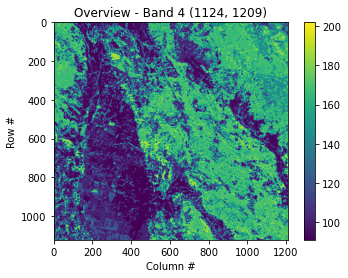

In [82]:
import matplotlib.pyplot as plt
myarray = np.array(ds.GetRasterBand(4).ReadAsArray())
myarray
plt.imshow(myarray)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(myarray.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

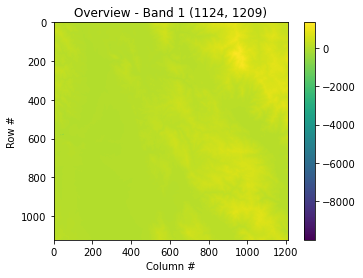

In [80]:
import matplotlib.pyplot as plt
myarray = np.array(ds.GetRasterBand(1).ReadAsArray())
myarray
plt.imshow(myarray)
plt.colorbar()
plt.title('Overview - Band 1 {}'.format(myarray.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

In [84]:
units = ds.GetRasterBand(2)

- Get raster data again

In [ ]:
import gdal, ogr, osr, numpy

In [108]:
rasters = gd.Open('landscape_lcp/Landscape_1.lcp')

In [109]:
ds = gd.Open('landscape_lcp/Landscape_1.lcp')

In [86]:
fm_raster = ds.GetRasterBand(4)

In [95]:
gt = ds.GetGeoTransform()

In [87]:
import geopandas as gpd

In [88]:
buffer_1_gpd = gpd.read_file("buffer_1/tubbs_ember_buffer_testing_1.shp")

In [110]:
driver = ogr.GetDriverByName('ESRI Shapefile')
shp = driver.Open("buffer_1/tubbs_ember_buffer_testing_1.shp")
lyr = shp.GetLayer()

In [113]:
# get raster georeference info
transform = rasters.GetGeoTransform()
xOrigin = transform[0]
yOrigin = transform[3]
pixelWidth = transform[1]
pixelHeight = transform[5]
transform

(-2293725.0, 30.0, 0.0, 2062245.0, 0.0, -30.0)

In [116]:
# reproject geometry to same projection as raster
sourceSR = lyr.GetSpatialRef()
targetSR = osr.SpatialReference()
targetSR.ImportFromWkt(rasters.GetProjectionRef())
coordTrans = osr.CoordinateTransformation(sourceSR,targetSR)
feat = lyr.GetNextFeature()
geom = feat.GetGeometryRef()
geom.Transform(coordTrans)

0

In [119]:
# Get extent of geometry
ring = geom.GetGeometryRef(0)
numpoints = ring.GetPointCount()
pointsX = []; pointsY = []
for p in range(numpoints):
        lon, lat, z = ring.GetPoint(p)
        pointsX.append(lon)
        pointsY.append(lat)
xmin = min(pointsX)
xmax = max(pointsX)
ymin = min(pointsY)
ymax = max(pointsY)
xmin, xmax, ymin, ymax

(-2270560.338867186,
 -2264891.4136352544,
 2048996.573669431,
 2052636.3179321259)

In [120]:
# Specify offset and rows and columns to read
xoff = int((xmin - xOrigin)/pixelWidth)
yoff = int((yOrigin - ymax)/pixelWidth)
xcount = int((xmax - xmin)/pixelWidth)+1
ycount = int((ymax - ymin)/pixelWidth)+1
xoff, yoff, xcount, ycount

(772, 320, 189, 122)

In [154]:
banddataraster = rasters.GetRasterBand(4).ReadAsArray().astype(numpy.float)
banddataraster.shape


(1124, 1209)

In [155]:
# create memory target raster
target_ds = gdal.GetDriverByName('MEM').Create('', banddataraster.shape[1], banddataraster.shape[0], gdal.GDT_Byte)
#target_ds.SetGeoTransform((
#    xmin, pixelWidth, 0,
#    ymax, 0, pixelHeight,
#))
target_ds.SetGeoTransform(transform)

0

In [156]:
# create for target raster the same projection as for the value raster
raster_srs = osr.SpatialReference()
raster_srs.ImportFromWkt(rasters.GetProjectionRef())
target_ds.SetProjection(raster_srs.ExportToWkt())
# rasterize zone polygon to raster
gdal.RasterizeLayer(target_ds, [1], lyr, burn_values=[1])

0

In [174]:
# read raster as arrays
banddataraster = rasters.GetRasterBand(4)
dataraster = banddataraster.ReadAsArray().astype(numpy.float)

bandmask = target_ds.GetRasterBand(1)
datamask = bandmask.ReadAsArray().astype(numpy.float)
datamask.shape, dataraster.shape

((1124, 1209), (1124, 1209))

Text(0, 0.5, 'Row #')

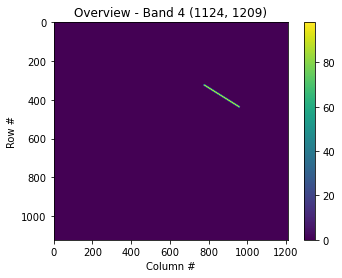

In [169]:
plt.imshow(datamask*98)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(datamask.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

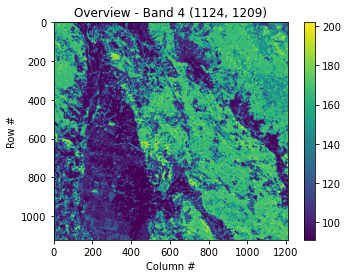

In [170]:
plt.imshow(dataraster)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(dataraster.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

Text(0, 0.5, 'Row #')

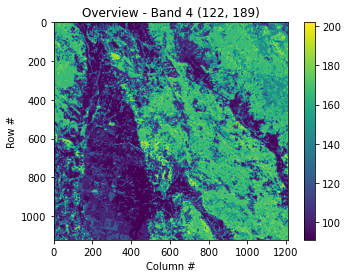

In [176]:
# zone of raster change
#zoneraster = np.ma.masked_array(dataraster,  datamask)
dataraster[datamask>0] = 98


plt.imshow(dataraster)
plt.colorbar()
plt.title('Overview - Band 4 {}'.format(zoneraster.shape))
plt.xlabel('Column #')
plt.ylabel('Row #')

+ whole part as a function

In [209]:
import gdal as gd
import ogr

def zonal_buffer(rasters, buffer, target_value):
    #Open landscape raster data which is lcp
    rasters = gd.Open(rasters)
    
    #Open buffer data that is a shape file
    driver = ogr.GetDriverByName('ESRI Shapefile')
    shp = driver.Open(buffer)
    lyr = shp.GetLayer()
    
    # get raster georeference info
    transform = rasters.GetGeoTransform()
    xOrigin = transform[0]
    yOrigin = transform[3]
    pixelWidth = transform[1]
    pixelHeight = transform[5]
    
    # reproject geometry to same projection as raster
    sourceSR = lyr.GetSpatialRef()
    targetSR = osr.SpatialReference()
    targetSR.ImportFromWkt(rasters.GetProjectionRef())
    coordTrans = osr.CoordinateTransformation(sourceSR,targetSR)
    feat = lyr.GetNextFeature()
    geom = feat.GetGeometryRef()
    geom.Transform(coordTrans)
    
    # Get extent of geometry
    ring = geom.GetGeometryRef(0)
    numpoints = ring.GetPointCount()
    pointsX = []; pointsY = []
    for p in range(numpoints):
            lon, lat, z = ring.GetPoint(p)
            pointsX.append(lon)
            pointsY.append(lat)
    xmin = min(pointsX)
    xmax = max(pointsX)
    ymin = min(pointsY)
    ymax = max(pointsY)
   
    # Specify offset and rows and columns to read
    xoff = int((xmin - xOrigin)/pixelWidth)
    yoff = int((yOrigin - ymax)/pixelWidth)
    xcount = int((xmax - xmin)/pixelWidth)+1
    ycount = int((ymax - ymin)/pixelWidth)+1
    
    # get the fuel model
    banddataraster = rasters.GetRasterBand(4).ReadAsArray().astype(numpy.float)
    
    # create memory target raster
    target_ds = gdal.GetDriverByName('MEM').Create('', banddataraster.shape[1], banddataraster.shape[0], gdal.GDT_Byte)
    target_ds.SetGeoTransform(transform)
    
    # create for target raster the same projection as for the value raster
    raster_srs = osr.SpatialReference()
    raster_srs.ImportFromWkt(rasters.GetProjectionRef())
    target_ds.SetProjection(raster_srs.ExportToWkt())
    # rasterize zone polygon to raster
    gdal.RasterizeLayer(target_ds, [1], lyr, burn_values=[1])
    
    # read raster as arrays
    banddataraster = rasters.GetRasterBand(4)
    dataraster = banddataraster.ReadAsArray()

    bandmask = target_ds.GetRasterBand(1)
    datamask = bandmask.ReadAsArray()
    
    #show the layer
    dataraster[datamask>0] = target_value

    plt.imshow(dataraster)
    plt.colorbar()
    plt.title('Overview - Band 4 {}'.format(dataraster.shape))
    plt.xlabel('Column #')
    plt.ylabel('Row #')
    
    return dataraster

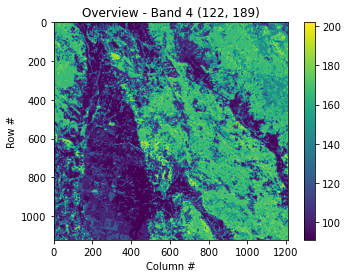

In [181]:
dr = zonal_buffer('landscape_lcp/Landscape_1.lcp', "buffer_1/tubbs_ember_buffer_testing_1.shp", 98)

In [183]:
np.where(dr != dataraster)

(array([], dtype=int64), array([], dtype=int64))

In [107]:
zonal_stats('landscape_lcp/Landscape_1.lcp', "buffer_1/tubbs_ember_buffer_testing_1.shp")

123.82384823848238

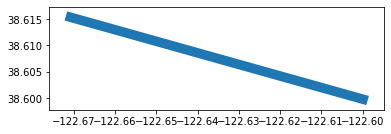

In [89]:
buffer_1_gpd.plot()

In [90]:
import ogr

In [91]:
source_ds = ogr.Open("buffer_1/tubbs_ember_buffer_testing_1.shp")
source_layer = source_ds.GetLayer()

In [92]:
pixelWidth = pixelHeight = 30 # depending how fine you want your raster
x_min, x_max, y_min, y_max = source_layer.GetExtent()
cols = int((x_max - x_min) / pixelHeight)
rows = int((y_max - y_min) / pixelWidth)

In [93]:
[x_min, x_max, y_min, y_max]

[-122.67220972877918,
 -122.59848894247726,
 38.598715885736766,
 38.616459755533675]

In [94]:
cols,rows

(0, 0)

In [299]:
geo = source_layer.GetGeoTransform()

AttributeError: type object 'object' has no attribute '__getattr__'

In [288]:
buffer_point = []

In [83]:
from glob import glob